# Data processing

1.Import the necessary libraries and read the data.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [2]:
df=pd.read_csv('fifa.csv')
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
pd.read_csv('fifa_ variable_information.csv ')

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


2.Drop any columns that you deem unecessary for analysis.



In [4]:
a=df.isnull().sum()/len(df)*100
a[a!=0]

Club                         1.323667
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve                        0.263635
FKAccuracy                   0.263635
LongPassing                  0.263635
BallControl                  0.263635
Acceleration                 0.263635
SprintSpeed                  0.263635
Agility     

In [5]:
df.drop(columns='Loaned From',axis=0,inplace=True)

3.The following columns need to be converted for further analysis.

'Value'

Wage'

Joined

'Contract Valid Until'

Height

Weight'

'Release Clause'


In [6]:
df['Value']=df['Value'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Value']=df['Value'].astype('float')
df['Value']

0              110.5
1         77000000.0
2              118.5
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [7]:
df['Wage']=df['Wage'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Wage']=df['Wage'].astype('float')

In [8]:
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [9]:
df1=pd.to_datetime(df['Joined'])
df['Joined']=df1.dt.year
df['Joined'].astype('float')

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [10]:
import datetime

In [11]:
df['Contract Valid Until']=df['Contract Valid Until'].astype('datetime64[ns]')

In [12]:
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [13]:
df['Height']=df['Height'].str.replace("'", ".")
df['Height']=df['Height'].astype('float')
df['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [14]:
df['Weight']=df['Weight'].str.replace("lbs",'.00')
df['Weight']=df['Weight'].astype('float')
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [15]:
df['Release Clause']=df['Release Clause'].str.replace('€','').str.replace('M','000000').str.replace('K','000')
df['Release Clause']=df['Release Clause'].astype('float')
df['Release Clause']

0           226.5
1           127.1
2           228.1
3           138.6
4           196.4
           ...   
18202    143000.0
18203    113000.0
18204    165000.0
18205    143000.0
18206    165000.0
Name: Release Clause, Length: 18207, dtype: float64

4.	Check for missing values and do a mean imputation where necessary.

In [16]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve     

In [17]:
df.skew()

C:\Users\ps388\AppData\Local\Temp/ipykernel_13876/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ID                          -2.267983
Age                          0.391764
Overall                      0.067185
Potential                    0.266154
Value                        9.454973
Wage                         7.906019
International Reputation     4.060420
Weak Foot                    0.138402
Skill Moves                  0.149898
Jersey Number                2.185483
Joined                      -2.533547
Height                      -0.546223
Weight                       0.216586
Crossing                    -0.594480
Finishing                   -0.300885
HeadingAccuracy             -0.885128
ShortPassing                -1.100316
Volleys                     -0.148651
Dribbling                   -1.084200
Curve                       -0.238195
FKAccuracy                   0.102117
LongPassing                 -0.595640
BallControl                 -1.267863
Acceleration                -0.815301
SprintSpeed                 -0.828586
Agility                     -0.599416
Reactions   

In [19]:
for i in df.columns:
    if df[i].dtype=='float':
        if df[i].skew()>1 or df[i].skew()<0:
            df[i].fillna(df[i].median(),inplace=True)
        if df[i].skew()==0 or df[i].skew()<1:
             df[i].fillna(df[i].mean(),inplace=True)
    elif df[i].dtype=='int':
        if df[i].skew()>1 or df[i].skew()<0:
            df[i].fillna(df[i].median(),inplace=True)
        if df[i].skew()==0 or df[i].skew()<1:
             df[i].fillna(df[i].mean(),inplace=True)
    elif df[i].dtype=='object':
        df[i].fillna(df[i].mode(),inplace=True)
            
    else:
        df[i].fillna(method='ffill',inplace=True)
               

In [20]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Photo                         0
Nationality                   0
Flag                          0
Overall                       0
Potential                     0
Club                        241
Club Logo                     0
Value                         0
Wage                          0
Preferred Foot               48
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                 0
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccura

In [21]:
df['Position'].fillna(method='ffill',inplace=True)

In [22]:
df['Position'].isnull().sum()

0

# explolatory analysis

1.	Plot the distribution of Overall rating for all players. 


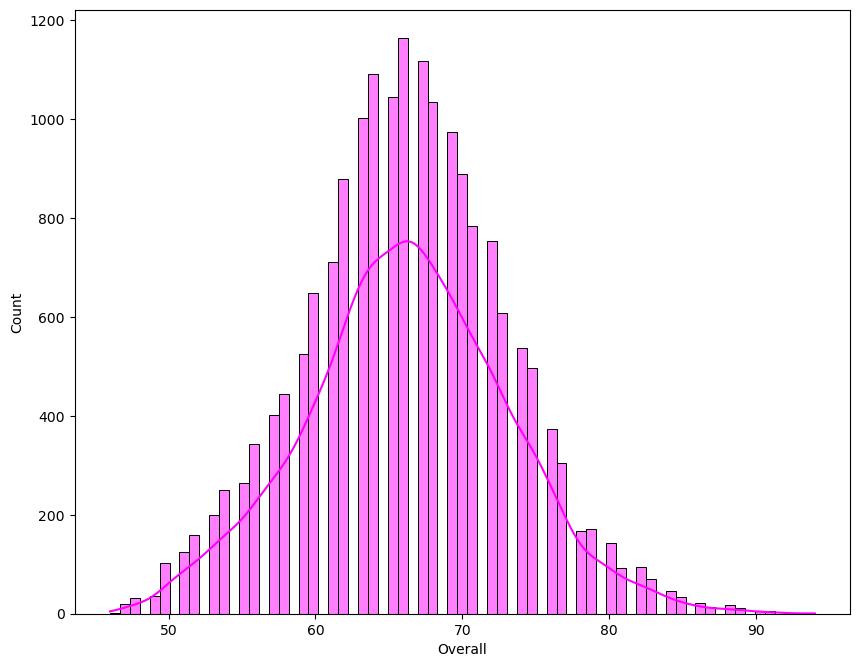

In [162]:
plt.figure(figsize=(10,8),dpi=100)
sns.histplot(data=df,x='Overall',kde=True, color='Fuchsia',edgecolor='Black')
plt.show()

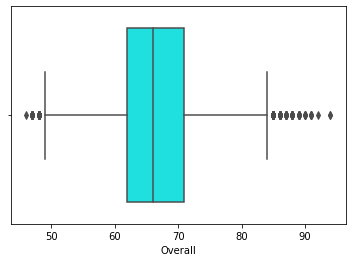

In [112]:
sns.boxplot(data=df,x='Overall',color='Aqua')
plt.show()

2.Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

a)	What would the average wage for this set of players be?

b)	What is the average age?

c)	Is there a correlation between the Overall rating and Value for these players?


In [117]:
df1=df[df['Contract Valid Until'].dt.year==2020].sort_values(by='Overall',ascending=False).head(20)
df1


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44.4
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5


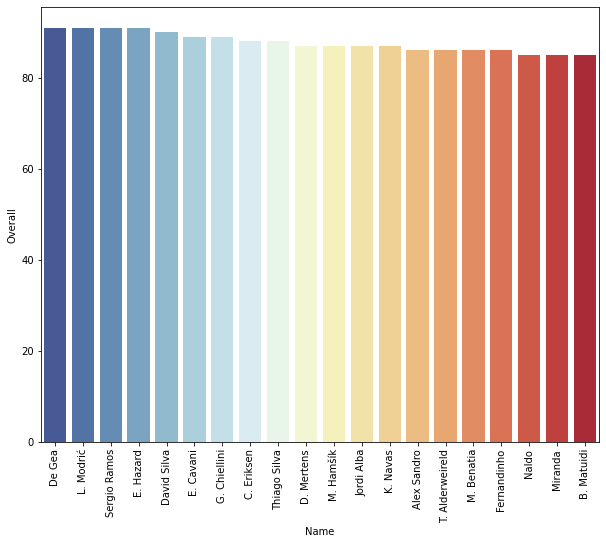

In [198]:
plt.figure(figsize=(10,8))
sns.barplot(data=df1,x='Name',y='Overall',palette='RdYlBu_r')
plt.xticks(rotation=90)
plt.show()

In [195]:
px.bar(df1,x='Name',y='Overall',hover_data=['Age','Club'],color='Position')

In [118]:
print('average wage for this set of players will be-',df1['Wage'].mean())

average wage for this set of players will be- 205450.0


In [119]:
print('avg age for this set of players will be-',df1['Age'].mean())

avg age for this set of players will be- 30.65


In [77]:
df1['Overall'].corr(df['Value'])
print('overall and value are moderately related-',df1['Overall'].corr(df['Value']))

overall and value are moderately related- 0.7564967646231812


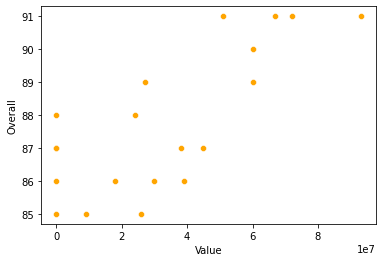

In [120]:
sns.scatterplot(data=df1,x='Value',y='Overall',color='orange')
plt.show()

4.	Generate tables containing the top 5 players by Overall rating for each unique position.

a)	Are there any players appearing in more than one Table. Please point out such players.

b)	What is the average wage one can expect to pay for the top 5 in every position?


In [101]:
df12=df.sort_values(['Position','Overall'],ascending=False).groupby('Position').head(5)
df12

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127.1
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160.7
23,153079,S. Agüero,30,https://cdn.sofifa.org/players/4/19/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119.3
36,173731,G. Bale,28,https://cdn.sofifa.org/players/4/19/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165.8
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5
61,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104.7
66,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74.3


In [199]:
plt.figure(figsize=(50,48),dpi=200)
sns.barplot(data=df12,x='Name',y='Overall',hue='Position',dodge=False,palette=sns.color_palette("husl", 8))
plt.xticks(rotation=90)
plt.show()

In [168]:
import plotly.express as px

In [194]:
px.bar(df12,x='Name',y='Overall',hover_data=['Age'],color='Position',title='Top 5 players from every position'
)

In [133]:
print(df12['Name'].value_counts().head(20))
print('No players present in other tables')


Cristiano Ronaldo    1
T. Kroos             1
Filipe Luís          1
D. Alaba             1
Alex Sandro          1
Jordi Alba           1
Marcelo              1
V. van Dijk          1
J. Vertonghen        1
K. Koulibaly         1
M. Hummels           1
G. Chiellini         1
Bruno Fernandes      1
M. Verratti          1
M. Hamšík            1
David Silva          1
F. de Jong           1
D. Tadić             1
Lucas Leiva          1
Marquinhos           1
Name: Name, dtype: int64
No players present in other tables


In [104]:
print('average wage one can expect to pay for the top 5 in every position is',df['Wage'].mean())

average wage one can expect to pay for the top 5 in every position is 9731.312132696215
